In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pylab as plt
from datetime import date
from datetime import timedelta
%matplotlib inline

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head() 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
reg = linear_model.LinearRegression()
x = df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
y = df['Appliances']
reg.fit(x, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 1.98970872e+00 -6.03740447e-01  1.51536202e+01 -1.77060184e+01
 -1.34806196e+01  2.54063968e+01  4.92457103e+00 -3.46525259e+00
 -1.78907733e-01 -2.78433827e-02  1.40960661e-01  7.12616274e+00
  2.87947692e-01  1.79462806e+00 -1.54968445e+00  8.14656214e+00
 -4.66967684e+00 -1.58724297e+01 -9.01020672e-01 -1.02281901e+01
  1.39856191e-01 -1.06374667e+00  1.70363647e+00  1.53681019e-01
  5.04880144e+00 -2.07763425e-02 -2.07763425e-02] + 50.2084365968783


In [20]:
predicted = reg.predict(x)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 8777.519929754457
R^2: 0.16490630926307814


In [18]:
y_predict = reg.predict(y)
y_predict


ValueError: Expected 2D array, got 1D array instead:
array=[ 60  60  50 ... 270 420 430].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

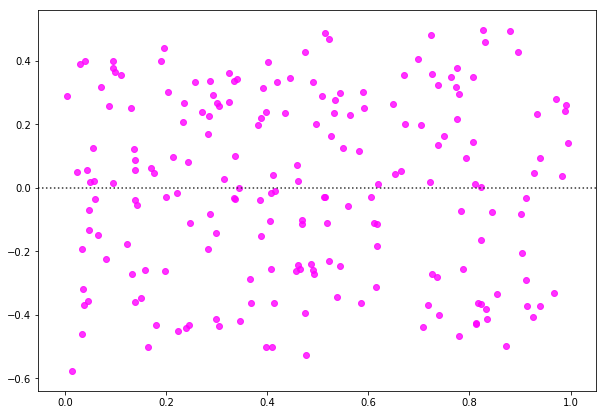

In [5]:
resid1 = np.random.rand(100,2)
resid2 = np.random.rand(100,2)
fig = plt.figure(figsize=(10,7))
sns.residplot(resid1, resid2, color='magenta')